## Q1. Preparing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Q2. Summary Report

In [2]:
cust=pd.read_csv('D:/sampledata/Retail Case Study/Customer.csv')
cust.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,2-1-70,M,4.0
1,269696,7-1-70,F,8.0


In [3]:
tran=pd.read_csv('D:/sampledata/Retail Case Study/Transactions.csv')
tran.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [4]:
prod_info=pd.read_csv('D:/sampledata/Retail Case Study/Prod_cat_info.csv')
prod_info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [5]:
cust.shape

(5647, 4)

In [6]:
prod_info.shape

(23, 4)

In [7]:
tran.shape

(23053, 10)

In [8]:
prod_info.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)

In [9]:
prod_concat=pd.merge(left=tran,right=prod_info,on=['prod_cat_code','prod_subcat_code'],how='left')
prod_concat.head(2)

# left is used becoz observation are more in transaction as compare to customer

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers


In [10]:
prod_concat.shape

(23053, 12)

In [11]:
prod_concat.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [12]:
prod_concat.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers


In [13]:
cust.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,2-1-70,M,4.0
1,269696,7-1-70,F,8.0


In [14]:
cust_final=pd.merge(left=cust,right=prod_concat,left_on='customer_Id',right_on='cust_id',how='right')

In [15]:
cust_final.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [16]:
cust_final.shape

(23053, 16)

In [17]:
tran.shape



# Rows of both the 'customer_final' and 'transaction' table are same. 
# That means all the transactions done at the Retail Store are present in the final table 

(23053, 10)

In [56]:
cust_final=cust_final.reset_index()

# Checking for duplicate values

In [57]:
cust_final.duplicated().sum()

0

In [58]:
cust_final.drop_duplicates(inplace=True)

In [59]:
cust_final.duplicated().sum()

0

In [60]:
cust_final.shape

(23040, 17)

In [61]:
cust_final.duplicated().sum()

0


### Column names with their data-types


In [62]:
cust_final.dtypes

index                        int64
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
cust_id                      int64
tran_date                   object
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

### Top 10 Observations

In [63]:
cust_final.head(10)

,index,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,0,268408,1970-01-02,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,1,268408,1970-01-02,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens
2,2,268408,1970-01-02,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,Mens
3,3,268408,1970-01-02,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,4,268408,1970-01-02,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,Footwear,Kids
5,5,268408,1970-01-02,M,4.0,56902862040,268408,30-01-2013,9,3,5,868,455.700,4795.700,e-Shop,Electronics,Cameras
6,6,268408,1970-01-02,M,4.0,56844530655,268408,14-10-2012,1,2,5,1175,616.875,6491.875,MBR,Footwear,Mens
7,7,268408,1970-01-02,M,4.0,19516063887,268408,7/9/2012,10,3,4,650,273.000,2873.000,e-Shop,Electronics,Audio and video
8,8,268408,1970-01-02,M,4.0,12644501524,268408,14-08-2012,4,4,3,321,101.115,1064.115,TeleShop,Bags,Women
9,9,268408,1970-01-02,M,4.0,63314547725,268408,26-04-2012,1,1,1,806,84.630,890.630,Flagship store,Clothing,Women


### 10 Bottom Observations

In [64]:
cust_final.tail(10)

,index,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23030,23043,270476,1992-12-25,F,3.0,78034405353,270476,13-08-2013,11,6,1,971,101.955,1072.955,TeleShop,Home and kitchen,Bath
23031,23044,270476,1992-12-25,F,3.0,3359888057,270476,16-03-2013,10,3,4,361,151.620,1595.620,MBR,Electronics,Audio and video
23032,23045,270476,1992-12-25,F,3.0,22883386455,270476,22-05-2012,4,2,4,898,377.160,3969.160,Flagship store,Footwear,Kids
23033,23046,270476,1992-12-25,F,3.0,19725194268,270476,21-02-2012,4,4,4,618,259.560,2731.560,e-Shop,Bags,Women
23034,23047,270476,1992-12-25,F,3.0,85475160771,270476,9/8/2011,5,3,5,1354,710.850,7480.850,Flagship store,Electronics,Computers
23035,23048,269626,1992-12-27,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,Tools
23036,23049,269626,1992-12-27,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,Kids
23037,23050,274308,1992-12-29,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,Footwear,Mens
23038,23051,274308,1992-12-29,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,Footwear,Mens
23039,23052,274308,1992-12-29,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,Books,Academic


### Five Number Summary

In [65]:
cust_final.describe()

,index,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23040.000000,23040.000000,23032.000000,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000
mean,11525.621354,271021.880252,5.483067,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226
std,6655.344380,2431.573668,2.863331,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295
min,0.000000,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,5761.750000,268935.000000,3.000000,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,11524.500000,270980.500000,5.000000,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000
75%,17290.250000,273114.250000,8.000000,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000
max,23052.000000,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


## Frequency Table :

### Store type

In [66]:
cust_final.loc[:,(cust_final.dtypes=='object')].describe()

,Gender,tran_date,Store_type,prod_cat,prod_subcat
count,23031,23040,23040,23040,23040
unique,2,1129,4,6,18
top,M,13-07-2011,e-Shop,Books,Women
freq,11804,35,9304,6066,3046


## Q3. Histograms for all continuous variables and frequency bars for categorical variables

### Histogram for continous variables -


### 1. Tax

In [67]:
cat_var=cust_final.loc[:,cust_final.dtypes=='int64']

In [68]:
cat_var.columns

Index(['index', 'customer_Id', 'transaction_id', 'cust_id', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000139BF5BE648>,
      dtype=object)

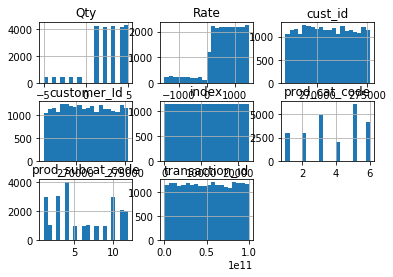

In [69]:
cat_var.hist(bins=20)

### 2. Total amount

In [70]:
cust_final.total_amt.sum()

48611294.81

### Frequency Bar for Categorical variables -



### 1. Gender

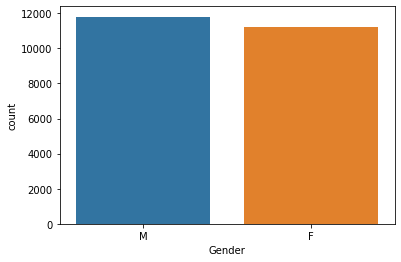

In [71]:
import seaborn as sns
sns.countplot(cust_final.Gender)

### 2. Store type

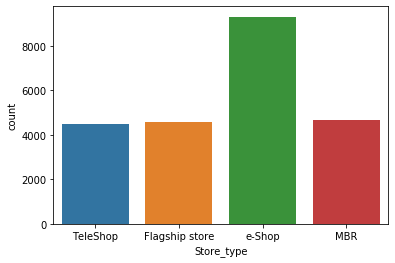

In [72]:
sns.countplot(cust_final.Store_type)

### 3. Product category

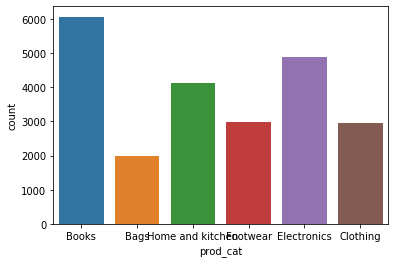

In [73]:
sns.countplot(cust_final.prod_cat)

### 4. Product sub category

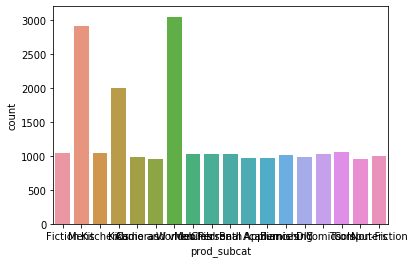

In [74]:
sns.countplot(cust_final.prod_subcat)

## Q4

### A. Time period of the available transaction data

In [75]:
cust_final.sort_values(by='tran_date')

,index,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
11191,11196,269269,1981-02-04,M,1.0,41901986246,269269,1/1/2012,7,5,2,1122,235.620,2479.620,MBR,Books,Fiction
8373,8377,269407,1978-04-25,F,1.0,76257166854,269407,1/1/2012,8,3,1,112,11.760,123.760,e-Shop,Electronics,Personal Appliances
17260,17271,270192,1987-06-01,F,4.0,47933752822,270192,1/1/2012,3,1,4,215,90.300,950.300,e-Shop,Clothing,Kids
6494,6497,271275,1976-07-01,M,8.0,78865860112,271275,1/1/2012,3,1,-5,-1344,705.600,-7425.600,TeleShop,Clothing,Kids
18768,18779,270397,1988-10-07,F,3.0,94167232406,270397,1/1/2012,10,6,4,619,259.980,2735.980,e-Shop,Home and kitchen,Kitchen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9386,9390,271112,1979-05-26,M,7.0,56887661045,271112,9/9/2013,2,6,3,740,233.100,2453.100,TeleShop,Home and kitchen,Furnishing
5147,5148,272590,1975-03-23,M,5.0,98358550517,272590,9/9/2013,11,6,5,615,322.875,3397.875,e-Shop,Home and kitchen,Bath
11130,11135,272928,1981-01-12,M,7.0,67713965405,272928,9/9/2013,4,2,4,1244,522.480,5498.480,e-Shop,Footwear,Kids
21099,21111,268137,1991-01-19,F,8.0,28914471254,268137,9/9/2013,2,6,1,1493,156.765,1649.765,e-Shop,Home and kitchen,Furnishing


In [76]:
maxx=cust_final.tran_date.max()

In [77]:
minn=cust_final.tran_date.min()


In [78]:
pd.Timestamp.strftime(maxx,format="%d-%m-%Y")  + " To " +pd.Timestamp.strftime(minn,format="%d-%m-%Y")

TypeError: descriptor 'strftime' requires a 'datetime.date' object but received a 'str'

### B. Count number of negative total amount

In [ ]:
cust_final.loc[cust_final.total_amt<0,'transaction_id'].count()

## Q5. Analyze which product categories are more popular among females vs male customers.

In [ ]:
a=cust_final.groupby(['prod_cat','Gender'])[['Qty']].sum().reset_index()
a

In [ ]:
a.pivot_table(index='Gender',columns='prod_cat',values='Qty')

## Q6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [ ]:
b=cust_final.groupby('city_code')['cust_id'].count().sort_values(ascending=False)


In [ ]:
b.plot(kind='bar')
plt.xlabel='city_code'
plt.ylabel='No of Customer'
plt.show()

In [79]:
round(b[4.0]/b.sum()*100,2)

NameError: name 'b' is not defined

## Q7. Which store type sells the maximum products by value and by quantity?

In [80]:
cust_final.groupby('Store_type')['Rate','Qty'].sum().sort_values(by='Qty',ascending=False).head(1)

,Rate,Qty
Store_type,,
e-Shop,5945770,22790


## Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [81]:
d=cust_final[(cust_final.Store_type=='Flagship store')& (cust_final.prod_cat.isin(['Electronics','Clothing']))]

In [82]:
d.total_amt.sum()

3409559.27

In [83]:
store_group=cust_final.pivot_table(index='prod_cat',columns='Store_type',values='total_amt',aggfunc='sum')

In [84]:
store_group.loc[['Clothing','Electronics'],'Flagship store'].sum()

3409559.27

## Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [85]:
e=cust_final.pivot_table(index='prod_cat',columns='Gender',values='total_amt',aggfunc='sum')
e

Gender,F,M
prod_cat,,
Bags,2079618.840,2046722.990
Books,6174590.825,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5711351.620
Footwear,3203155.215,3020200.365
Home and kitchen,4133702.235,4305169.505


In [86]:
e.loc['Electronics','M']

5711351.620000008

## Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [87]:
cust_final.loc[cust_final.total_amt>0].head(2)

,index,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,0,268408,1970-01-02,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
2,2,268408,1970-01-02,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,Mens


In [88]:
f=cust_final.groupby('customer_Id').transaction_id.count().reset_index()
f

,customer_Id,transaction_id
0,266783,5
1,266784,3
2,266785,8
3,266788,4
4,266794,12
...,...,...
5501,275257,5
5502,275261,5
5503,275262,2
5504,275264,2


In [89]:
f[f.transaction_id>10].count()

customer_Id       36
transaction_id    36
dtype: int64

## Q11. For all customers aged between 25 - 35, find out:


### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [119]:
dob=cust_final['DOB'].dt.year

In [123]:
cust_final['age']=dt.today().year-dob

In [125]:
cust_age=cust_final[(age>25)&(age<35)]

In [127]:
cust_age.total_amt.sum()

14939002.195

### b.  What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [105]:
cust_final['tran_date']=pd.to_datetime(cust_final['tran_date'])

In [109]:
t_date=cust_final[(cust_final['tran_date']>'1st Jan, 2014')& (cust_final['tran_date']<'1st Mar, 2014' )]

In [110]:
t_date.total_amt.sum()

1305716.62

In [ ]:
aa